# Outline

In [1]:
import numpy as np

from matplotlib       import pyplot     as plt
from sklearn.datasets import make_blobs as blobs

In [2]:
def extend_x(X: np.array)->np.array:
    """
      Appends a colum of ones to the X matrix
        -> X_ex = [X Ones]
      
      @param X: -> shape = (n_samples,k_features)
      
      @return X_ex: -> shape = (n_samples,k_features+1)
    """
    ones = np.ones( X.shape[0] )[:,np.newaxis]
    
    return np.concatenate( (X,ones), axis=-1 ).copy()

In [3]:
def pseudo_inv (X: np.array, Y: np.array)->np.array:
    """
      Compute the pseudoinverse matrix for regression/classification
        -> pinv = (X^T X)^-1 X^T y
        
      @param X: -> shape = (n_samples,k_features)
      @param Y: -> shape = (n_samples,1)
      
      @return pinv: -> shape = (k_features,1)
    """
    pinv = np.dot( X.T,X )
    pinv = np.linalg.inv(pinv)
    pinv = np.dot( pinv,X.T )
    pinv = np.dot( pinv,Y   )
    
    return pinv

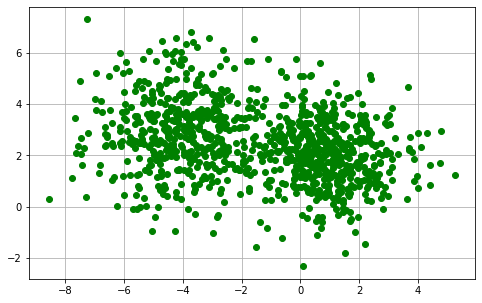

In [10]:
N    = 1000
X, Y = blobs( n_samples=N,
              centers  =[ [-4,3],[1,2] ],
              cluster_std=[1.5,1.25] )

plt.figure(figsize=(8,5))
plt.plot( X[:,0],X[:,1], 'o', color='green' )
plt.grid(True)

In [6]:
X_ext = extend_x( X[:,0:1] )
W     = pseudo_inv(X_ext,X[:,1:2])

print(W.shape)

(2, 1)


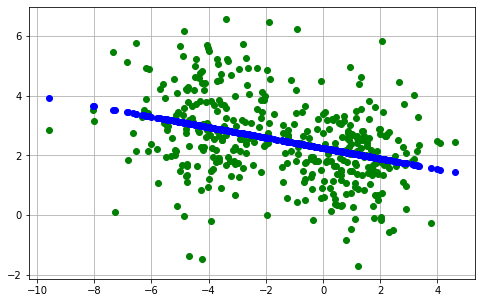

In [7]:
reg = np.dot(X_ext,W)

plt.figure(figsize=(8,5))
plt.plot( X[:,0],X[:,1], 'o', color='green' )
plt.plot( X[:,0],reg   , 'o', color='blue' )
plt.grid(True)

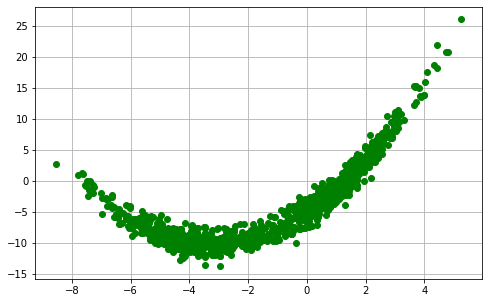

In [19]:
X_cuad = X[:,0:1]
Y_cuad = 0.5*X[:,0:1]**2 + 3.2*X[:,0:1] - 5
Y_cuad = Y_cuad + np.random.normal( 0,1.25,Y_cuad.shape )

plt.figure(figsize=(8,5))
plt.plot( X_cuad[:,0],Y_cuad[:,0], 'o', color='green' )
plt.grid(True)

In [20]:
X_cuad = np.concatenate(  (X[:,0:1]**2, X[:,0:1]),axis=-1  )
X_ext  = extend_x( X_cuad )
W      = pseudo_inv(X_ext,Y_cuad)

print(W)

[[ 0.49683238]
 [ 3.18167305]
 [-4.9785639 ]]


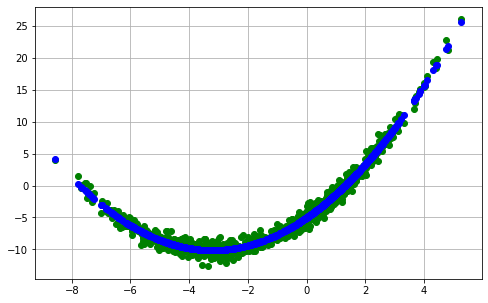

In [18]:
reg = np.dot(X_ext,W)

plt.figure(figsize=(8,5))
plt.plot( X[:,0],Y_cuad, 'o', color='green' )
plt.plot( X[:,0],reg   , 'o', color='blue' )
plt.grid(True)

In [ ]:
N    = 1000
X, Y = blobs( n_samples=N,
              centers  =[ [-4,3],[1,2] ],
              cluster_std=[1.5,1.25] )

plt.figure(figsize=(8,5))
plt.plot( X[Y==0,0],X[Y==0,1], 'o', color='green' )
plt.plot( X[Y==1,0],X[Y==1,1], 'o', color='blue' )
plt.grid(True)

In [ ]:
NT = 700
NE = N-NT

index = np.arange(N)
np.random.shuffle(index)

XT = X[ index[   :NT] ]
XE = X[ index[-NE:  ] ]

YT = -2*(Y[ index[   :NT] ]==0) + 1
YE = -2*(Y[ index[-NE:  ] ]==0) + 1

In [ ]:
k = 7

ones = np.ones( XT.shape[0]//k )
base = np.identity(k)

folds = np.kron(base,ones).astype('bool')

In [ ]:
for f in folds:
    X_Train = extend_x( XT[~f] )
    Y_Train = YT[~f]
    X_Test  = extend_x( XT[f] )
    Y_Test  = YT[f]
    
    W       = pseudo_inv(X_Train,Y_Train)
    
    Y_Lab   = np.dot(X_Test,W)
    Y_Lab   = -2*(Y_Lab<0) + 1
    
    print(  c_matrix( Y_Test[:,np.newaxis],Y_Lab[:,np.newaxis] )  )

In [ ]:
def c_matrix(Y,L):
    M = np.concatenate( (Y,L),axis=-1 )
    T = np.array( [ [-1, -1],
                    [-1,  1],
                    [ 1, -1],
                    [ 1,  1]  ] 
                )
    
    return ( np.dot(M,T.T)>0 ).sum(axis=0)

In [ ]:
y = np.array( [-1, -1, -1, -1, -1,    1, 1, 1, 1,  1] )
l = np.array( [ 1, -1, -1, -1, -1,   -1, 1, 1, 1, -1] )

M = np.concatenate( (y[:,np.newaxis],l[:,np.newaxis]),axis=-1 )
T = np.array( [ [-1, -1],
                [-1,  1],
                [ 1, -1],
                [ 1,  1]  ] 
                )

( np.dot(M,T.T)>0 ).sum(axis=0)